In [1]:
import numpy as np
import os
from skimage.measure import block_reduce
from scipy.misc import imread
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys
import optparse
from libtiff import TIFF
from PIL import Image
import re
import itertools
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt

import math
%matplotlib inline

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [38]:
# outdir = '/media/juliana/MAC/data/JR009/20150625b/20150625_JR009_500um_0080Hz/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_blueLED/structs'
# outdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_red2/structs'
# outdir = '/media/juliana/IMDATA/widefield/JR005W/20160222/awake_bar_0013hz/structs'

# outdir = '/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0013/structs'
# outdir = '/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008/structs'

# outdir = '/media/nas/volume1/widefield/data/CE015/20160706/CE015_circle_013/structs'
outdir = '/media/nas/volume1/widefield/data/CE015/20160706/CE015_bar_013Hz/structs'


# reduce_factor = (1, 1)
# reduceit=0
# run_num = str(1)
# append = 'nas'

In [39]:
rundir = os.path.split(outdir)[0]
sessiondir = os.path.split(rundir)[0]
reduceit=0

/media/nas/volume1/widefield/data/CE015/20160706
surface
['16bitSurf (1).tif']
.tif


(-0.5, 217.5, 163.5, -0.5)

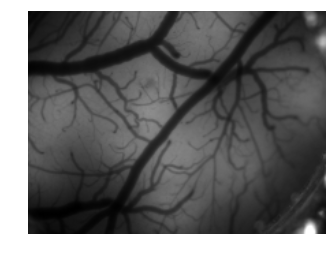

In [40]:
#################################################################################
# GET BLOOD VESSEL IMAGE:
#################################################################################
# folders = os.listdir(rundir)
# figpath = [f for f in folders if f == 'figures']

folders = os.listdir(sessiondir)
figpath = [f for f in folders if f == 'surface'][0]

print sessiondir
print figpath

if figpath:
    figdir = figpath[0]
    tmp_ims = os.listdir(os.path.join(sessiondir, figpath))
    surface_words = ['surface', 'GREEN', 'green', 'Surface', 'Surf']
    ims = [i for i in tmp_ims if any([word in i for word in surface_words])]
    print ims
    impath = os.path.join(sessiondir, figpath, ims[0])

    
    # image = Image.open(impath) #.convert('L')
    # imarray = np.asarray(image)
    print os.path.splitext(impath)[1]
    if os.path.splitext(impath)[1] == '.tif':
        tiff = TIFF.open(impath, mode='r')
        surface = tiff.read_image().astype('float')
        tiff.close()
        plt.imshow(surface)
    else:
        image = Image.open(impath) #.convert('L')
        surface = np.asarray(image)


else: # NO BLOOD VESSEL IMAGE...
    surface = np.zeros([200,300])

if reduceit:
    surface = block_reduce(surface, reduce_factor, func=np.mean)

plt.imshow(surface, cmap='gray')
plt.axis('off')

In [41]:

files = os.listdir(outdir)
files = [f for f in files if os.path.splitext(f)[1] == '.pkl']
# dstructs = [f for f in files if 'D_target_FFT' in f and str(reduce_factor) in f]
# if not dstructs:
#     dstructs = [f for f in files if 'D_' in f and str(reduce_factor) in f] # address older analysis formats

append='nas'
dstructs = [f for f in files if 'Target_fft' in f]
print dstructs

D = dict()
for f in dstructs:
    outfile = os.path.join(outdir, f)
    with open(outfile,'rb') as fp:
        D[f] = pkl.load(fp)


['Target_fft_Left_run1_(1, 1)_.pkl', 'Target_fft_Right_run1_(1, 1)_.pkl', 'Target_fft_Bottom_run1_(1, 1)_.pkl', 'Target_fft_Top_run1_(1, 1)_.pkl']


In [42]:
# Get specific keys:

bottomkeys = [k for k in D.keys() if 'Bottom' in k or 'Up' in k]
topkeys = [k for k in D.keys() if 'Top' in k or 'Down' in k]

leftkeys = [k for k in D.keys() if 'Left' in k]
rightkeys = [k for k in D.keys() if 'Right' in k]

el_keys = [topkeys, bottomkeys]
az_keys = [leftkeys, rightkeys]

print "AZ keys: ", az_keys
print "EL keys: ", el_keys

# curr_keys = [leftkey, rightkey, topkey, bottomkey]

# for curr_key in curr_keys:
#     print curr_key, outshape

#     if "Left" in curr_key:
#         leftmap = D[curr_key]['ft']
#     elif "Right" in curr_key:
#         rightmap = D[curr_key]['ft']
#     elif "Down" in curr_key or "Top" in curr_key:
#         downmap = D[curr_key]['ft']
#     elif "Up" in curr_key and "Bottom" in curr_key:
#         upmap = D[curr_key]['ft']

AZ keys:  [['Target_fft_Left_run1_(1, 1)_.pkl'], ['Target_fft_Right_run1_(1, 1)_.pkl']]
EL keys:  [['Target_fft_Top_run1_(1, 1)_.pkl'], ['Target_fft_Bottom_run1_(1, 1)_.pkl']]


In [43]:
# grab legends:

legend_dir = '/home/juliana/Repositories/retinotopy-mapper/tests/simulation'

# MAKE LEGENDS:

winsize = [1920, 1200]
screen_size = [int(i*0.25) for i in winsize]
print screen_size

create_legend = 0

if create_legend:
    V_left_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, -1*math.pi, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_left_legend[i][0:screen_size[0]/2] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(1*math.pi, 0, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_left_legend[i][screen_size[0]/2:] = nspaces_end
        
else:
    legend_name = 'V-Left_legend.tif'
    V_left_legend = imread(os.path.join(legend_dir, legend_name))

    
if create_legend:
    V_right_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, 1*math.pi, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_right_legend[i][0:screen_size[0]/2] = nspaces_start
    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(-1*math.pi, 0, screen_size[0]/2)
    for i in range(screen_size[1]):
        V_right_legend[i][screen_size[0]/2:] = nspaces_end
        
else:
    legend_name = 'V-Right_legend.tif'
    V_right_legend = imread(os.path.join(legend_dir, legend_name))

    
if create_legend:        
    H_down_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, -1*math.pi, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_down_legend[0:screen_size[1]/2, i] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(1*math.pi, 0, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_down_legend[screen_size[1]/2:, i] = nspaces_end
        
else:
    legend_name = 'H-Down_legend.tif'
    H_down_legend = imread(os.path.join(legend_dir, legend_name))


if create_legend:
    H_up_legend = np.zeros((screen_size[1], screen_size[0]))
    # First, set half the screen width (0 to 239 = to 0 to -pi)
    nspaces_start = np.linspace(0, 1*math.pi, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_up_legend[0:screen_size[1]/2, i] = nspaces_start

    # Then, set right side of screen (240 to end = to pi to 0)
    nspaces_end = np.linspace(-1*math.pi, 0, screen_size[1]/2)
    for i in range(screen_size[0]):
        H_up_legend[screen_size[1]/2:, i] = nspaces_end
else:
    legend_name = 'H-Up_legend.tif'
    H_up_legend = imread(os.path.join(legend_dir, legend_name))


[480, 300]


Curr key is:  Target_fft_Left_run1_(1, 1)_.pkl
Showing:  Target_fft_Left_run1_(1, 1)_.pkl


(-0.5, 217.5, 163.5, -0.5)

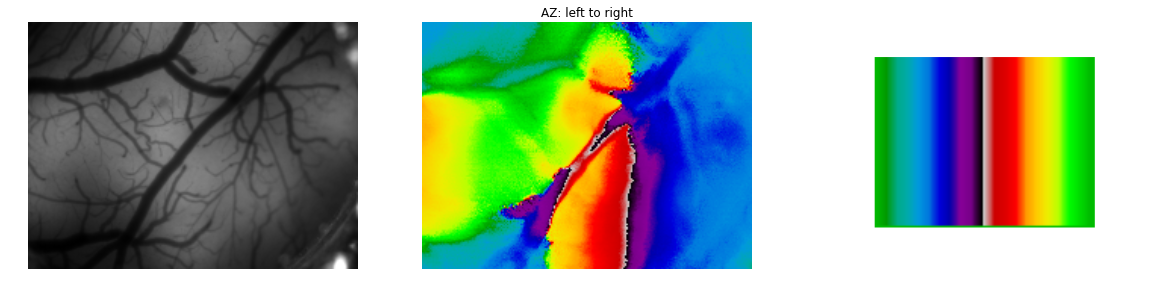

In [57]:
######################################################################
# V-LEFT:
######################################################################

# run_num = 2
# reduce_factor = (1, 1)
# append = 'nas'
# cond_type = 'Left'

run_num = 1
reduce_factor = (1, 1)
append = ''#'nas'
cond_type = 'Left'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in leftkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print leftkeys
else:
    leftkey = tmp_keys[0]
    print "Curr key is: ", leftkey

leftmap = D[leftkey]['ft']

currkey = leftkey
currmap = leftmap

fig = plt.figure()
print "Showing: ", currkey

fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('AZ: left to right')

ax = fig.add_subplot(1,3,3)
plt.imshow(V_left_legend, cmap='spectral')
plt.axis('off')

fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

Curr key is:  Target_fft_Right_run1_(1, 1)_.pkl
Showing:  Target_fft_Right_run1_(1, 1)_.pkl


(-0.5, 217.5, 163.5, -0.5)

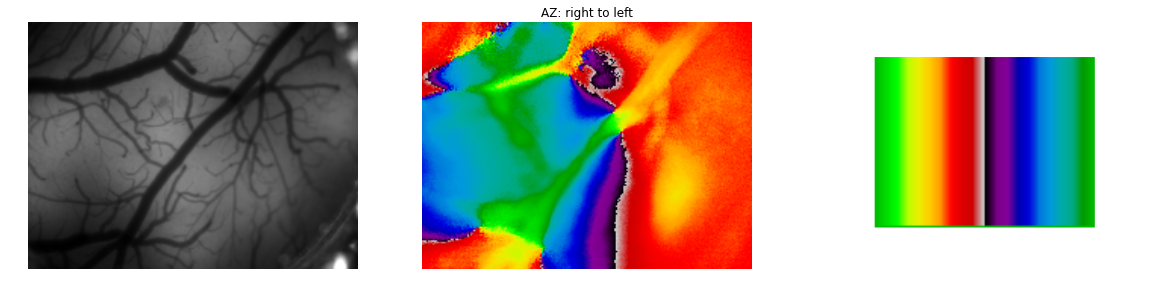

In [58]:
######################################################################
# V-RIGHT:
######################################################################
# fig = plt.figure()


run_num = 1 #3
reduce_factor = (1, 1)
append = ''#'nas'
cond_type = 'Right'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in rightkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print rightkeys
else:
    rightkey = tmp_keys[0]
    print "Curr key is: ", rightkey

rightmap = D[rightkey]['ft']

currkey = rightkey
currmap = rightmap

fig = plt.figure(figsize=(20,10))
print "Showing: ", currkey

plt.subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('AZ: right to left')
plt.axis('off')

ax = fig.add_subplot(1,3,3)
plt.imshow(V_right_legend, cmap='spectral')
plt.axis('off')

fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

/media/nas/volume1/widefield/data/CE015/20160706/CE015_bar_013Hz/structs/V-Right_3_reduce1.jpg


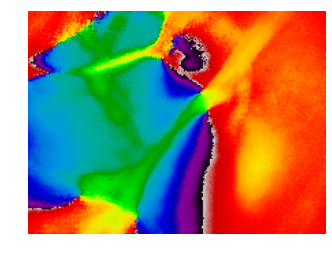

In [46]:

# JUST plot the figure, for slide

plt.imshow(np.angle(currmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# plt.title('AZ: right to left')
plt.axis('off')

imname = 'V-Right_3_reduce1'
impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

Curr key is:  Target_fft_Top_run1_(1, 1)_.pkl
Showing:  Target_fft_Top_run1_(1, 1)_.pkl


(-0.5, 217.5, 163.5, -0.5)

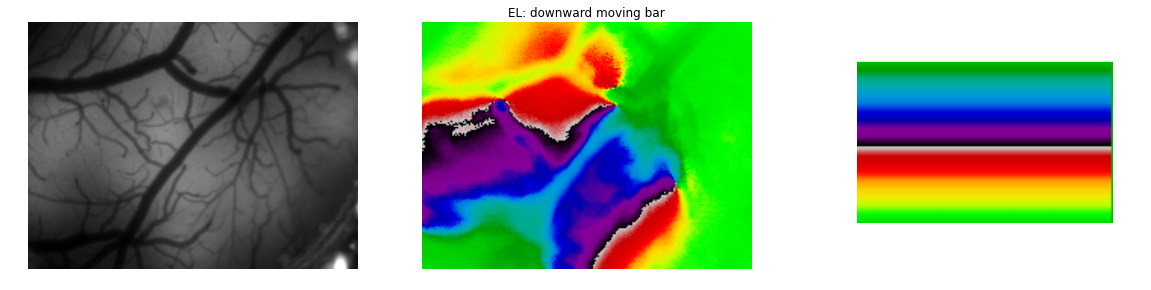

In [56]:
######################################################################
# H-TOP: start from top, move down ("downward")
######################################################################


# run_num = 3
# reduce_factor = (1, 1)
# append = 'nas'
# # cond_type = 'Top'
# cond_type = 'Down'

run_num = 1 #3
reduce_factor = (1, 1)
append = '' #'nas'
cond_type = 'Top'
# cond_type = 'Down'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in topkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print topkeys
else:
    topkey = tmp_keys[0]
    print "Curr key is: ", topkey

topmap = D[topkey]['ft']

currkey = topkey
currmap = topmap

print "Showing: ", currkey
fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('EL: downward moving bar')

ax = fig.add_subplot(1,3,3)
plt.imshow(H_down_legend, cmap='spectral')
plt.axis('off')


fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

Curr key is:  Target_fft_Bottom_run1_(1, 1)_.pkl
Showing:  Target_fft_Bottom_run1_(1, 1)_.pkl


(-0.5, 217.5, 163.5, -0.5)

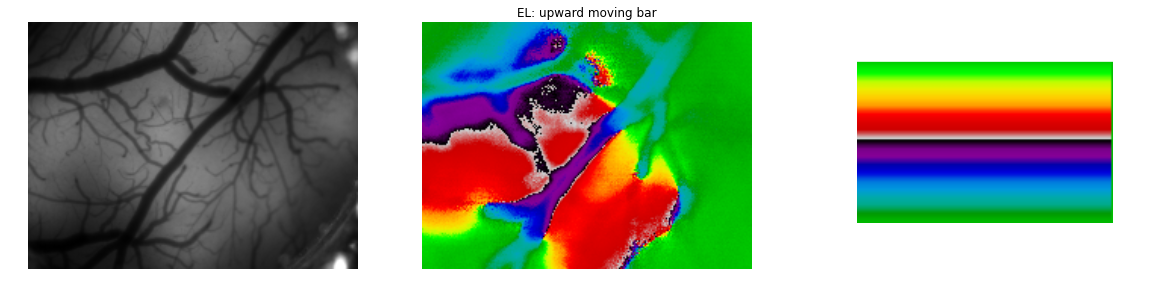

In [59]:
######################################################################
# H-BOTTOM: bar moving from BOTTOM to TOP ("UPward")
######################################################################


# run_num = 3
# reduce_factor = (1, 1)
# append = 'nas'
# # cond_type = 'Bottom'
# cond_type = 'Up'


run_num = 1#3
reduce_factor = (1, 1)
append = ''#'nas'
cond_type = 'Bottom'
# cond_type = 'Up'

run_conds = [cond_type, str(run_num)+'_', str(reduce_factor), append]

tmp_keys = [k for k in bottomkeys if all([c in k for c in run_conds])] #[0]
if len(tmp_keys) > 1:
    print "More than 1 match found: "
    print tmp_keys
elif tmp_keys == []:
    print "No matches found from list: "
    print bottomkeys
else:
    bottomkey = tmp_keys[0]
    print "Curr key is: ", bottomkey

bottommap = D[bottomkey]['ft']

currkey = bottomkey
currmap = bottommap

print "Showing: ", currkey

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,3)
plt.imshow(H_up_legend, cmap='spectral')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(np.angle(currmap), cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('EL: upward moving bar')

fig.add_subplot(1,3,1)
plt.imshow(surface, cmap='gray')
plt.axis('off')

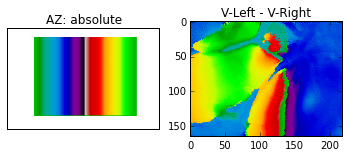

In [50]:
######################################################################
# ABSOLUTE AZIMUTH
######################################################################
# For LEFTMAP - RIGHTMAP, color legend follows LEFT-only map direction:

azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.

# SEE ABOVE COLORBAR
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('AZ: absolute')
fig.add_subplot(1,2,2)
plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('V-Left - V-Right')

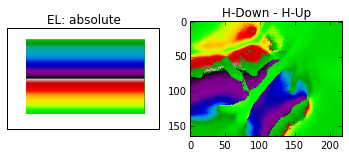

In [51]:
######################################################################
# ABSOLUTE ELEVATION
######################################################################

elevation_phase = ( np.angle(topmap) - np.angle(bottommap) ) / 2.

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(H_down_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

plt.title('EL: absolute')
fig.add_subplot(1,2,2)
plt.imshow(elevation_phase, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.title('H-Down - H-Up')

(-0.5, 431.5, 287.5, -0.5)

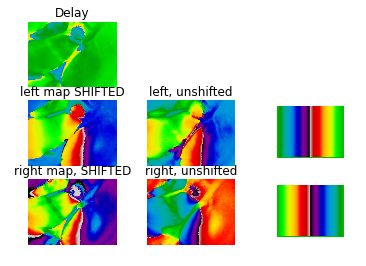

In [52]:
######################################################################
# DELAY VERT:
######################################################################

fig = plt.figure()

colormap = 'spectral'

# 1. Delay map
fig.add_subplot(3,3,1)
# delay_vert = (np.angle(leftmap) + np.angle(rightmap)) / 2.
delay_vert = np.angle(leftmap * rightmap) / 2.
plt.imshow(delay_vert, cmap=colormap,  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title("Delay")

# 2. blank

# 3. LEFT-map shifted
fig.add_subplot(3,3,4)
# shift_left = np.angle(leftmap.conjugate()) - delay_vert
shift_left = np.angle(leftmap) - delay_vert
plt.imshow(shift_left, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('left map SHIFTED')

# 4. LEFT-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(leftmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('left, unshifted')

# 5.  LEFT-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(V_left_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

# 6. RIGHT-map shifted
fig.add_subplot(3,3,7)
# shift_right = np.angle(rightmap) - delay_vert
shift_right = np.angle(rightmap.conjugate()) - delay_vert
plt.imshow(shift_right, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('right map, SHIFTED')

# 7. RIGHT-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(rightmap), cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('right, unshifted')

# 8. RIGHT-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(V_right_legend, cmap=colormap, vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

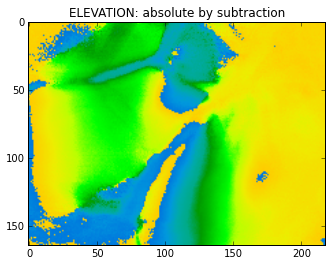

In [53]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
azimuth_phase = ( np.angle(leftmap / rightmap) ) / 2.

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

NameError: name 'double_left_legend' is not defined

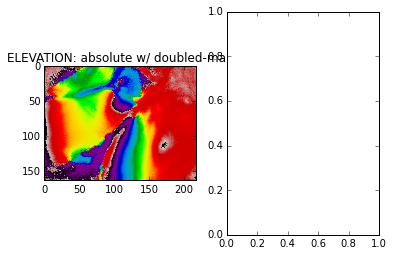

In [54]:
# azimuth_phase = ( np.angle(leftmap) - np.angle(rightmap) ) / 2.
fig = plt.figure()
fig.add_subplot(1,2,1)
azimuth_phase = np.angle(leftmap / rightmap) 
# azimuth_phase = np.angle(rightmap / leftmap) 

plt.imshow(azimuth_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ doubled-map')

fig.add_subplot(1,2,2)
plt.imshow(double_left_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)


(-0.5, 431.5, 287.5, -0.5)

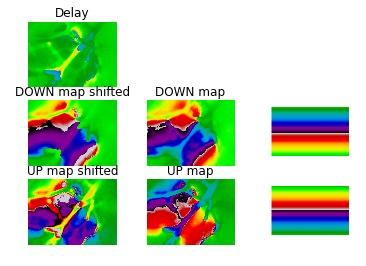

In [55]:
######################################################################
# DELAY HORIZ:
######################################################################

fig = plt.figure()

# 1. Delay map
fig.add_subplot(3,3,1)
delay_horz = np.angle(topmap * bottommap) / 2.
plt.imshow(delay_horz, cmap='spectral',  vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title("Delay")

# 2. blank

# 3. DOWN-map shifted
fig.add_subplot(3,3,4)
# shift_down = np.angle(downmap.conjugate()) - delay_horz
shift_top = np.angle(topmap) - delay_horz
plt.imshow(shift_top, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('DOWN map shifted')

# 4. DOWN-map relative
ax = fig.add_subplot(3,3,5)
plt.imshow(np.angle(topmap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('DOWN map')

# 5.  Down-map LEGEND
ax = fig.add_subplot(3,3,6)
plt.imshow(H_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

# 6. UP-map shifted
fig.add_subplot(3,3,7)
shift_bottom = np.angle(bottommap.conjugate()) - delay_horz
# shift_up = delay_horz - np.angle(upmap.conjugate())
plt.imshow(shift_bottom, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('UP map shifted')

# 7. UP-map relative
ax = fig.add_subplot(3,3,8)
plt.imshow(np.angle(bottommap), cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')
plt.title('UP map')

# 8. UP-map LEGEND
ax = fig.add_subplot(3,3,9)
plt.imshow(H_up_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.axis('off')

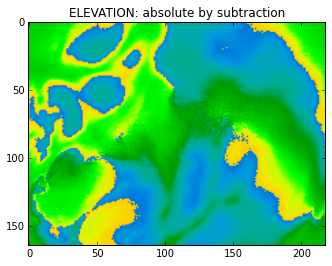

In [292]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = ( np.angle(topmap / bottommap) ) / 2.

plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute by subtraction')

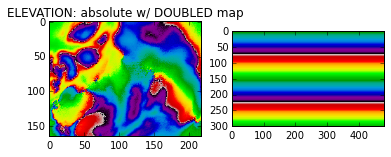

In [293]:
# elevation_phase = ( np.angle(downmap) - np.angle(upmap) ) / 2.
elevation_phase = np.angle(topmap / bottommap)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(elevation_phase, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.title('ELEVATION: absolute w/ DOUBLED map')

fig.add_subplot(1,2,2)
plt.imshow(double_down_legend, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)

In [324]:
#######################################
# Set THRESHOLD params:
#######################################

thresh = 0.3
log_thresh = 0.7
use_log = 1

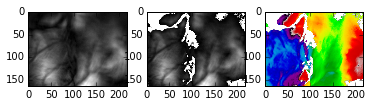

In [325]:

# V-LEFT:
# MASK WITH MAGNITUDE:
# LEFT

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = leftkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

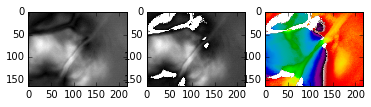

In [37]:
# V-RIGHT:  MASK WITH MAGNITUDE:
# RIGHT 

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = rightkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

In [34]:
# MASK WITH MAGNITUDE:
# H-DOWN: 
log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = topkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

NameError: name 'topkey' is not defined

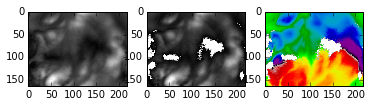

In [328]:
# MASK WITH MAGNITUDE:
# H-UP: 

log_thresh = 0.8
thresh = 0.5
use_log = 1

curr_key = bottomkey

fig = plt.figure()
mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

###################################
fig.add_subplot(1,3,1)

plt.imshow(mag_map, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,2)
if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

###################################
fig.add_subplot(1,3,3)

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)

-3.0586809439198652

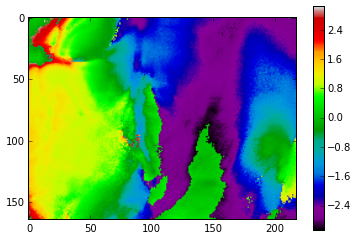

In [329]:
######################################################################
# ABSOLUTE AZIMUTH -- SHIFT NEGATIVE VALS
######################################################################

phase_left = np.angle(leftmap)
phase_right = np.angle(rightmap)

for x in range(phase_left.shape[0]):
    for y in range(phase_left.shape[1]):
        if phase_left[x,y] < 0:
            phase_left[x,y] += 2*math.pi

for x in range(phase_right.shape[0]):
    for y in range(phase_right.shape[1]):
        if phase_right[x,y] < 0:
            phase_right[x,y] += 2*math.pi

        
# plt.imshow(phase_left, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
# phase_left

# plt.subplot(1,2,2)
# plt.imshow(phase_right, cmap='spectral')
# plt.colorbar()
        
az = (phase_left - phase_right) / 2.
# plt.imshow(az, cmap='spectral') #, vmin=-1*math.pi, vmax=1*math.pi)
plt.imshow(az, cmap='spectral') #, vmin=0, vmax=2*math.pi)
plt.colorbar()
# plt.colorbar()
# x = np.where(phase_left<0)
# len(x[1])
# phase_left.max()
az.min()

/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008/structs/AZ_right_phase_overlay_withkey.jpg


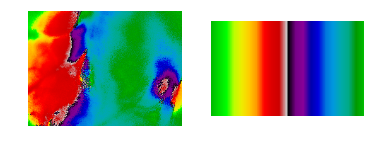

In [330]:
# GCaMP6f map - Vertically-moving right looks dec:

use_log = 1
log_thresh = 0.7
thresh = 0.3

curr_key = rightkey

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(V_right_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'AZ_right_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008/structs/EL_bottom_phase_overlay_withkey.jpg


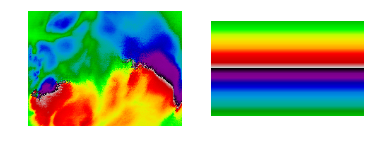

In [332]:
# fig = plt.figure()

curr_key = bottomkey

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']


###################################

use_log = 1
log_thresh = 0.7
thresh = 0.5

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(H_up_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'EL_bottom_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

Target_fft_H-Down_3_(1, 1)_nas.pkl
/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008/structs/EL_top_phase_overlay_withkey.jpg


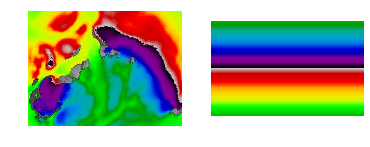

In [333]:
# fig = plt.figure()

use_log = 1
log_thresh = 0.8
# thresh = 0.3

curr_key = topkey
print curr_key

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']


###################################

# use_log = 1
# log_thresh = 0.7

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(H_down_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'EL_top_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath

/media/nas/volume1/widefield/data/CE004/20160203/anesthetized_bar_0008/structs/AZ_left_phase_overlay_withkey.jpg


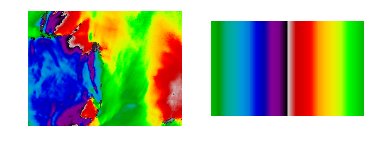

In [334]:
# fig = plt.figure()

curr_key = leftkey

fig = plt.figure()

mag_map = D[curr_key]['mag_map']
phase_map = D[curr_key]['phase_map']


###################################

use_log = 1
log_thresh = 0.7

fig.add_subplot(1,2,1)

plt.imshow(surface, cmap='gray')

if use_log:
    [mx, my] = np.where(np.log(mag_map) >= log_thresh*np.log(mag_map.max()))
else:
    [mx, my] = np.where(mag_map >= thresh*mag_map.max())

mask = np.ones(mag_map.shape) * 100
mask[mx, my] = mag_map[mx, my]
[nullx, nully] = np.where(mask == 100)
mask[nullx, nully] = np.nan
mask = np.ma.array(mask)

plt.imshow(mask, cmap='gray')
# plt.colorbar()

phase_mask = np.ones(mag_map.shape) * 100
phase_mask[mx, my] = phase_map[mx, my]
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


ax = fig.add_subplot(1,2,2)
plt.imshow(V_left_legend, cmap='spectral')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.axis('off')

imname = 'AZ_left_phase_overlay_withkey'
impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.jpg')
plt.savefig(impath, format='jpg')


print impath